this time instead of generating the data will use an already existing one to be more accurate

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## data loading

we will use a fuel consumption data which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
- MODEL YEAR e.g. 2014
- MAKE e.g. VOLVO
- MODEL e.g. S60 AWD
- VEHICLE CLASS e.g. COMPACT
- ENGINE SIZE e.g. 3.0
- CYLINDERS e.g 6
- TRANSMISSION e.g. AS6
- FUEL TYPE e.g. Z
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
- FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
- FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
- CO2 EMISSIONS (g/km) e.g. 182

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

## data cleaning

1- observing the data for any useless features

2- dropping them features 

3- observing the correlation between the target and the other features

4- dropping the less important features as they can cause noise

In [39]:
df.head()
# notice how some features are non numerical or the same for all samples hence being useless 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [40]:
df = df.drop(["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "FUELTYPE", "TRANSMISSION"], axis=1)

In [41]:
df.corr()
# observe the bottom row as the correlation between the CO2 emissions(target) and the other features 
# Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the other fuel consumption columns
# examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [42]:
df = df.drop(["CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"], axis=1)

In [ ]:
# instead of doing all this work u can check for the usable features and assign them for the data frame in one step  
# df = df[["ENGINESIZE", "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]]

## data observation

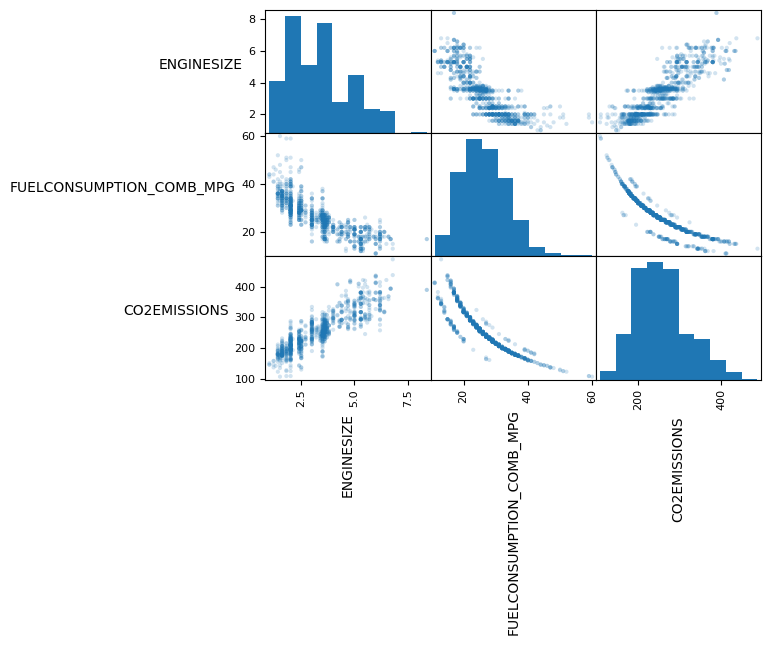

In [47]:
axes = pd.plotting.scatter_matrix(df, .2)                   # scatter matrix to visualize the relation between features
for ax in axes.flatten():                                   # for fixing the labels to be able to see them
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

# we can see that the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear.

## data preprocessing 